In [4]:
import pandas as pd 
import re
import jieba as jb
import matplotlib.pyplot as plt

data = pd.read_excel('附件3.xlsx')
# data.head()

#判断是否有空值
print("在留言详情列中总共有 %d 个空值." % data['留言详情'].isnull().sum())
print("在标签列中总共有 %d 个空值." % data['留言主题'].isnull().sum())

#定义删除除语句中字母,数字，汉字函数
def remove_punctuation(line):
    line = str(line)
    if line.strip()=='':
        return ''
    rule = re.compile(u"[^a-zA-Z0-9\u4E00-\u9FA5]")
    line = rule.sub('',line)
    return line

#过滤语句中字母，数字，汉字函数
data['留言详情'] = data['留言详情'].apply(remove_punctuation)

#加载停用词汇
filepath = "StopWords.txt"
stopwords = [line.strip() for line in open(filepath, 'r', encoding='utf-8').readlines()]

jb.suggest_freq('A市', True)

#语句使用滤停用词
%time data['cut_clean_data'] = data['留言详情'].apply(lambda x: " ".join([w for w in list(jb.cut(x)) if w not in stopwords]))
data['cut_clean_data'].to_csv('clean_data.txt',encoding="utf_8_sig")

data

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\Public\Documents\Wondershare\CreatorTemp\jieba.cache


在留言详情列中总共有 0 个空值.
在标签列中总共有 0 个空值.


Loading model cost 0.608 seconds.
Prefix dict has been built successfully.


Wall time: 10.3 s


c:\users\lyh\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:33: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.


,留言编号,留言用户,留言主题,留言时间,留言详情,反对数,点赞数,cut_clean_data
0,188006,A000102948,A3区一米阳光婚纱艺术摄影是否合法纳税了？,2019/2/28 11:25:05,座落在A市A3区联丰路米兰春天G2栋320一家名叫一米阳光婚纱艺术摄影的影楼据说年单这一个工...,0,0,座落在 A市 A3 区联 丰路 米兰 春天 G2 栋 320 一家 名叫 一米阳光 婚纱 艺...
1,188007,A00074795,咨询A6区道路命名规划初步成果公示和城乡门牌问题,2019/2/14 20:00:00,A市A6区道路命名规划已经初步成果公示文件什么时候能转化成为正式的成果希望能加快完成的路名规...,0,1,A市 A6 区 道路 命名 规划 已经 初步 成果 公示 文件 转化 成为 正式 成果 希望...
2,188031,A00040066,反映A7县春华镇金鼎村水泥路、自来水到户的问题,2019/7/19 18:19:54,本人系春华镇金鼎村七里组村民不知是否有相关水泥路到户政策和自来水到户政策如政府主导投资村民部...,0,1,系 春华 镇金鼎村 七里 组 村民 不知 是否 相关 水泥路 到户 政策 自来水 到户 政策...
3,188039,A00081379,A2区黄兴路步行街大古道巷住户卫生间粪便外排,2019/8/19 11:48:23,靠近黄兴路步行街城南路街道大古道巷一步两搭桥小区停车场东面围墙外第一单元一住户卫生间粪便长年...,0,1,靠近 黄兴路 步行街 城 南路 街道 古道 巷 一步 两 搭桥 小区 停车场 东面 围墙 外...
4,188059,A00028571,A市A3区中海国际社区三期与四期中间空地夜间施工噪音扰民,2019/11/22 16:54:42,A市A3区中海国际社区三期四期中间即蓝天璞和洲幼儿园旁边那块空地一直处于三不管状态物业不管城...,0,0,A市 A3 区 中海 国际 社区 三期 四期 中间 蓝天 璞 洲 幼儿园 旁边 块 空地 一...
...,...,...,...,...,...,...,...,...
4321,360110,A110021,A市经济学院寒假过年期间组织学生去工厂工作,2019-11-22 14:42:14,关于西地省A市经济学院寒假过年期间组织学生去工厂工作过年本该是家人团聚的时光很多家长一年回来...,0,0,西地省 A市 经济 学院 寒假 过年 期间 组织 学生 工厂 工作 过年 本该 家人 团聚 ...
4322,360111,A1204455,A市经济学院组织学生外出打工合理吗？,2019-11-05 10:31:38,一名中职院校的学生学校组织我们学生在外边打工在外省做流水线工作还要倒白夜班本来都在学校好好上...,1,0,一名 中职 院校 学生 学校 组织 学生 外边 打工 外省 做 流水线 工作 倒 白夜 班 ...
4323,360112,A220235,A市经济学院强制学生实习,2019-04-28 17:32:51,各位领导干部大家好我是A市经济学院的一名学生临近毕业学校开始组织学生参加实习当然学生是必须实...,0,0,领导 干部 A市 经济 学院 一名 学生 临近 毕业 学校 组织 学生 参加 实习 学生 必...
4324,360113,A3352352,A市经济学院强制学生外出实习,2018-05-17 08:32:04,A市经济学院强制16届电子商务跟企业物流专业实习其中我们企业物流专业实习6个月去江苏暑假去过...,3,0,A市 经济 学院 强制 16 届 电子商务 企业 物流 专业 实习 企业 物流 专业 实习 ...


In [5]:
#文档相似度计算
from gensim.models import Word2Vec
from gensim.models.word2vec import LineSentence
# 指定向量维度
n_dim = 400

#建立Word2Vec模型，参数定义至少在10个文档中出现过
w2vmodel = Word2Vec(size = n_dim, min_count = 15)

#生成词表
w2vmodel.build_vocab(LineSentence('clean_data.txt'))
w2vmodel.wv.vocab.keys()

%time w2 = w2vmodel.train(LineSentence('clean_data.txt'),total_examples = w2vmodel.corpus_count, epochs = 10)
w2

Wall time: 3.65 s


(4010141, 5328600)

In [3]:
#训练完毕模型实质
w2vmodel.wv['学生']
#词向量的相似度
print(w2vmodel.wv.most_similar('学生'))
#寻找不合群的词
w2vmodel.wv.doesnt_match('学生 院校 学习 上课 道路 规划'.split())


[('在校', 0.8708213567733765), ('接送', 0.8526713848114014), ('补课', 0.8473405838012695), ('上课', 0.8397630453109741), ('放学', 0.8352636694908142), ('家长', 0.8225957155227661), ('周末', 0.8156570792198181), ('小朋友', 0.8155423402786255), ('幼儿', 0.8126198053359985), ('训练', 0.8039258122444153)]


c:\users\lyh\appdata\local\programs\python\python37\lib\site-packages\gensim\models\keyedvectors.py:877: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


'规划'

In [6]:
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer, CountVectorizer
from sklearn.decomposition import PCA, TruncatedSVD
#向量化
print('------Vertorizer-----')

# 词频矩阵
vertorizer = TfidfVectorizer(sublinear_tf=True, max_df=0.46)
transformer = TfidfTransformer()

#原始数据的训练
freq_words_matrix = vertorizer.fit_transform(data.cut_clean_data)

#得到词袋
words = vertorizer.get_feature_names()
# print(words)

#训练得到维度
tfidf = transformer.fit_transform(freq_words_matrix)
# print(tfidf)
weight = freq_words_matrix.toarray()

print("Shape: Documents(Class) / Words")
print(weight.shape)

#降维处理
pca = PCA(n_components=10)
trainingData = pca.fit_transform(weight)
trainingData.shape

------Vertorizer-----
Shape: Documents(Class) / Words
(4326, 41555)


(4326, 10)

In [7]:
from sklearn.cluster import KMeans
clf = KMeans(n_clusters=600, max_iter=10000, init="k-means++", tol=1e-6)

result = clf.fit(trainingData)
source = list(clf.predict(trainingData))


In [10]:
from sklearn import metrics

#观测生成的词向量归类结果集
label = clf.labels_
print("len(clf.labels_):",len(clf.labels_))

# 找出聚类中心
r2 = pd.DataFrame(clf.cluster_centers_)
print("聚类中心:",clf.cluster_centers_)

#统计各个类别的数目
r1 = pd.Series(clf.labels_).value_counts()
print("各个类别的数目",r1)

#横向连接（0是纵向），得到聚类中心对应的类别下的数目
# r = pd.concat([r2, r1], axis = 1)
# print(r)
"""
生成各个指标
"""
# 评价参数表示的是簇中某一点到簇中距离的和
print("inertia_:",clf.inertia_)

#观测轮廓系数；Silhouette值在[-1, 1]内，接近1表示样本远离邻近类，取0表示样本几乎在两个近邻类的决策边界上，取负值表示样本被分在错误的类里
silhouette = metrics.silhouette_score(trainingData, label)
print("silhouette: ", silhouette)

# CH指标通过计算类中各点与类中心的距离平方和来度量类内的紧密度，通过计算各类中心点与数据集中心点距离平方和来度量数据集的分离度，CH指标由分离度与紧密度的比值得到。从而，CH越大代表着类自身越紧密，类与类之间越分散，即更优的聚类结果。
CHI = metrics.calinski_harabaz_score(trainingData, label)
print("CHI: ", CHI)

len(clf.labels_): 4326
聚类中心: [[-2.05019932e-02 -1.23732150e-02 -2.10720068e-02 ... -2.57242184e-02
  -1.10671409e-02  1.38169240e-06]
 [-7.36230041e-02 -1.89769030e-01  3.66857655e-01 ... -6.55990613e-03
  -3.40614300e-02 -1.20670669e-02]
 [ 4.67549943e-02 -3.23100579e-02 -2.50850055e-02 ... -6.17742823e-03
  -1.54825890e-02  5.58596045e-02]
 ...
 [ 7.31928637e-02 -1.06181394e-01 -6.59774916e-02 ... -6.59027615e-02
  -4.34407538e-02  3.61769927e-02]
 [-1.63243854e-02  9.84019309e-02  3.35529581e-02 ... -1.09215844e-01
   3.76697922e-03 -2.40387672e-03]
 [-9.94056468e-02 -5.12285216e-02  4.38534444e-02 ...  3.98844070e-02
  -5.97275219e-02  6.02529979e-02]]
各个类别的数目 26     59
369    34
494    33
516    33
16     33
       ..
3       1
341     1
328     1
79      1
585     1
Length: 600, dtype: int64
inertia_: 9.540019081495963
silhouette:  0.1609574966796859
CHI:  88.31741492737213


c:\users\lyh\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=FutureWarning)


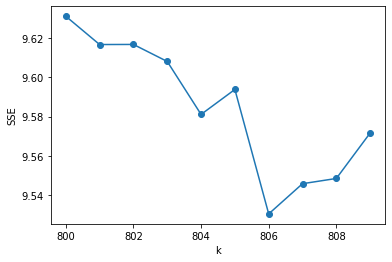

In [14]:
SSE = []  # 存放每次结果的误差平方和
for k in range(590,600):
    estimator = KMeans(n_clusters=k)  # 构造聚类器
    estimator.fit(trainingData)
    SSE.append(estimator.inertia_)
X = range(590,600)
plt.xlabel('k')
plt.ylabel('SSE')
plt.plot(X,SSE,'o-')
plt.show()

In [12]:
#装生成的结果封装到表中
data['ID'] = clf.labels_
data = data[['ID','留言编号','留言用户','留言主题','留言时间','留言详情','反对数','点赞数']]
data

,ID,留言编号,留言用户,留言主题,留言时间,留言详情,反对数,点赞数
0,26,188006,A000102948,A3区一米阳光婚纱艺术摄影是否合法纳税了？,2019/2/28 11:25:05,座落在A市A3区联丰路米兰春天G2栋320一家名叫一米阳光婚纱艺术摄影的影楼据说年单这一个工...,0,0
1,369,188007,A00074795,咨询A6区道路命名规划初步成果公示和城乡门牌问题,2019/2/14 20:00:00,A市A6区道路命名规划已经初步成果公示文件什么时候能转化成为正式的成果希望能加快完成的路名规...,0,1
2,350,188031,A00040066,反映A7县春华镇金鼎村水泥路、自来水到户的问题,2019/7/19 18:19:54,本人系春华镇金鼎村七里组村民不知是否有相关水泥路到户政策和自来水到户政策如政府主导投资村民部...,0,1
3,202,188039,A00081379,A2区黄兴路步行街大古道巷住户卫生间粪便外排,2019/8/19 11:48:23,靠近黄兴路步行街城南路街道大古道巷一步两搭桥小区停车场东面围墙外第一单元一住户卫生间粪便长年...,0,1
4,308,188059,A00028571,A市A3区中海国际社区三期与四期中间空地夜间施工噪音扰民,2019/11/22 16:54:42,A市A3区中海国际社区三期四期中间即蓝天璞和洲幼儿园旁边那块空地一直处于三不管状态物业不管城...,0,0
...,...,...,...,...,...,...,...,...
4321,95,360110,A110021,A市经济学院寒假过年期间组织学生去工厂工作,2019-11-22 14:42:14,关于西地省A市经济学院寒假过年期间组织学生去工厂工作过年本该是家人团聚的时光很多家长一年回来...,0,0
4322,380,360111,A1204455,A市经济学院组织学生外出打工合理吗？,2019-11-05 10:31:38,一名中职院校的学生学校组织我们学生在外边打工在外省做流水线工作还要倒白夜班本来都在学校好好上...,1,0
4323,132,360112,A220235,A市经济学院强制学生实习,2019-04-28 17:32:51,各位领导干部大家好我是A市经济学院的一名学生临近毕业学校开始组织学生参加实习当然学生是必须实...,0,0
4324,75,360113,A3352352,A市经济学院强制学生外出实习,2018-05-17 08:32:04,A市经济学院强制16届电子商务跟企业物流专业实习其中我们企业物流专业实习6个月去江苏暑假去过...,3,0


In [13]:
# 600/4326约为13，可以大概评估热点数据需要12条
for i in range(0,600):
    if(r1[i]<=13): 
        data['ID'].loc[data.ID==i]='X'

# 过滤为'X'值得行        
# data.drop(data.ID.loc[data.ID=='X'])

# 对问题进行排序
# data = data.sort_values(by=['问题ID'])

data.to_csv('热点问题留言明细表.csv',encoding="utf_8_sig")

c:\users\lyh\appdata\local\programs\python\python37\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
c:\users\lyh\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [16]:
hot_data = pd.read_csv('热点问题留言明细表.csv')
df = pd.DataFrame(columns=('id','heat'))

# 读取数据并进行热度评价
for i in range(0,600):
    data_test = hot_data.loc[hot_data.ID==i]
    hot = len(data_test)*0.9+(data_test['点赞数'].sum()-data_test['反对数'].sum())*0.1
#     hot = len(data_test)
    df=df.append(pd.DataFrame({'id':[i],'heat':[hot]}))

# 保存热度评价表
df.to_csv('热度.csv')
print('1')

1


In [17]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
%time decomposition_data = tsne.fit_transform(weight)


Wall time: 20min 37s


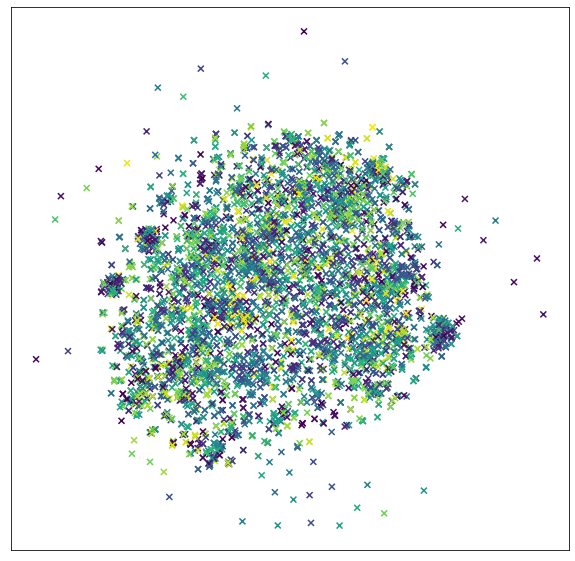

In [18]:
decomposition_data.shape
x = []
y = []
for i in decomposition_data:
    x.append(i[0])
    y.append(i[1])

fig = plt.figure(figsize=(10, 10))
ax = plt.axes()
plt.scatter(x, y, c=clf.labels_, marker="x")
plt.xticks(())
plt.yticks(())
plt.show()